# Lab 4: Statistical Techniques
In this lab, we will explore :

*   Permutation test
*   Bootstrap

##**permutation test:**

---


A permutation test is a statistical hypothesis test that involves permuting or shuffling the data to determine the distribution of a test statistic under the null hypothesis.

Under the null hypothesis, the distribution of the test statistic is obtained by calculating all possible values of the test statistic under possible rearrangements of the observed data. Permutation tests are, therefore, a form of resampling.



###**Type error:**
Understanding how permutation tests impact Type I and Type II errors can significantly improve the robustness of statistical conclusions and research findings.

- **Type I Error:** These tests help control Type I error rates, which are false positives where a null hypothesis is incorrectly rejected [[1](https://www.researchgate.net/publication/232893505_Using_Permutation_Tests_to_Reduce_Type_I_and_II_Errors_for_Small_Ruminant_Research)].
- **Type II Error:** Permutation tests also aid in reducing Type II errors, which are false negatives where a true alternative hypothesis is not detected[[1](https://www.researchgate.net/publication/232893505_Using_Permutation_Tests_to_Reduce_Type_I_and_II_Errors_for_Small_Ruminant_Research)].

- **p-values:** The p-value is the probability of obtaining a result at least as extreme as the test statistic given that the null hypothesis is true [[2](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2687965/#:~:text=As%20in%20all%20statistical%20hypothesis,the%20null%20hypothesis%20is%20true)]



By utilizing permutation tests effectively and considering their impact on error types, researchers can enhance the accuracy and credibility of their statistical analyses.

### **Permutation test:**

We will apply Permutation test and Bootstrap using the Titanic dataset and understand their practical implications.


#### **Import Libraries and load Data:**

In [ ]:
#Import Libraries :
import pandas as pd


# Load Data:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


####**Data Preparation :**

This involves handling missing values and extracting relevant features, clean it and prepare it for analysis.

In [ ]:
import numpy as np

titanic_ages = titanic.loc[:, ['Survived', 'Age']].dropna()   #  Extracts the 'Survived' and 'Age' columns and drops rows with missing values.
survived = titanic_ages[titanic_ages['Survived']==1]          #  Filters rows where 'Survived' is 1 (survived).
not_survived = titanic_ages[titanic_ages['Survived']==0]      #  Filters rows where 'Survived' is 0 (did not survive).


# Converts the 'Age' columns of the survived and not survived groups into numpy arrays.
survived_sample = np.array(survived['Age'])
not_survived_sample = np.array(not_survived['Age'])

####**Define HypothesisTest:**
- $H_O$: There is no difference in mean of ages between survived and not survived

- $H_1$: There is a statistically significant difference in mean of ages between survived and not survived

In [ ]:
import matplotlib.pyplot as plt

# Define HypothesisTest Class
class HypothesisTest(object):

    def __init__(self, data):

        self.data = data
        self.actual = self.test_stat(data)
        self.test_stats = np.array([self.test_stat(self.run_model())
                                    for i in range(1000)])

    def p_value(self, iters=1000): #calculates p-vauue

        return np.mean(self.test_stats >= self.actual)


    #Plots a histogram of the test statistics with some visualization options.
    def plot_hist(self, low=None, high=None):
        options = dict(alpha=0.5, color='C0')
        xs, ys, patches = plt.hist(self.test_stats,
                                  density=True,
                                  histtype='step',
                                  linewidth=3,
                                  **options)

        plt.ylabel('Density')
        plt.tight_layout()
        return patches[0]
    #Fills the histogram between low and high values using the given patch.
    def fill_hist(self, low, high, patch):
        options = dict(alpha=0.5, color='C0')
        fill = plt.axvspan(low, high,
                          clip_path=patch,
                          **options)


    def plot_test_stats(self): #plots cdf

        patch = self.plot_hist()
        low = self.actual
        high = np.max(self.test_stats)
        self.fill_hist(low, high, patch)
        plt.title('Distribution of test stat under null')

    def test_stat(self, data): #computes the test statistics

        group1, group2 = data
        return abs(group1.mean() - group2.mean())

    def run_model(self): #run a model of a null hypothesis

        n = len(self.data[0])
        pool = np.hstack(self.data)
        np.random.shuffle(pool)
        data = np.split(pool, [n])
        return data

####**Run Hypothesis Test:**

Diff means permute number of homicides
actual = 2.282489590110604
p-value = 0.036


Text(0.5, 15.0, 'Difference in mean')

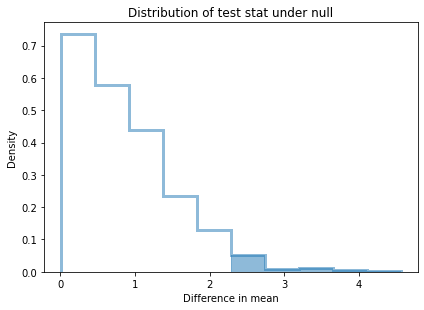

In [ ]:
data = (survived_sample, not_survived_sample)
ht = HypothesisTest(data)
p_value = ht.p_value()

print('Diff means permute number of homicides')
print('actual =', ht.actual)
print('p-value =', p_value)
ht.plot_test_stats()
plt.xlabel('Difference in mean')

#### Confidence interval:
In the context of a permutation test, a confidence interval is a range of values that is used to estimate the true value of a parameter. It provides a measure of the uncertainty associated with the estimate.


In [ ]:
class Resampler(object):

    def __init__(self, sample, xlim=None): #stores the actual sample
        self.sample = sample
        self.n = len(sample)
        self.xlim = xlim

    def resample(self): #generates a new sample by choosing from the original sample with replacement
        new_sample = np.random.choice(self.sample, self.n, replace=True)
        return new_sample

    def sample_stat(self, sample): #computes the sample statistics
        return sample.mean()

    def compute_sampling_distribution(self, iters=1000): #collects the statistics from the experiments
        stats = [self.sample_stat(self.resample()) for i in range(iters)]
        return np.array(stats)

    def plot_sampling_distribution(self): #plots the sampling distribution
        sample_stats = self.compute_sampling_distribution()
        se = sample_stats.std()
        ci = np.percentile(sample_stats, [2.5, 97.5])
        print("95% confidence interval for the height:",ci)
        options = dict(alpha=0.5, color='C0')
        xs, ys, patches = plt.hist(sample_stats,
                 density=True,
                 histtype='step',
                 linewidth=3,
                 **options)
        fill = plt.axvspan(ci[0], ci[1],
                       clip_path=patches[0],
                       **options)
        plt.tight_layout()
        plt.xlabel('sample statistic')
        plt.xlim(self.xlim)
        plt.show()

95% confidence interval for the height: [162.50869701 168.31624346]


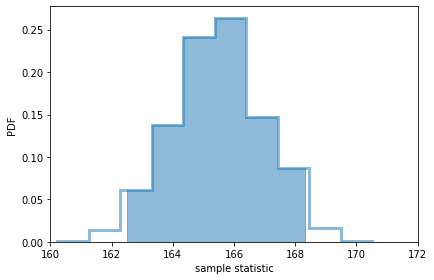

In [ ]:
import scipy.stats as stats


mu = 165           #sample mean
sigma = 15         #sample standard deviation
height = stats.norm(mu, sigma)
xs = np.linspace(135, 195, 100)
ys = height.pdf(xs)
plt.xlabel('height (cm)')
plt.ylabel('PDF')
number_of_elements = 100
sample = height.rvs(number_of_elements)
resampler = Resampler(sample, xlim=[160, 172])
resampler.plot_sampling_distribution()

### EXERCISE 1:

Complete the following code. Perform a permutation test to determine if there is a significant difference between the means of two samples. Use the following sample data:

Sample 1: [14, 15, 16, 19, 22, 24]

Sample 2: [11, 12, 13, 15, 18, 21]

Steps to perform the permutation test:
1. Combine the two samples into one dataset.
2. Randomly shuffle the combined dataset and split it into two new samples of the same size as the original samples.
3. Calculate the difference in means between the two new samples.
4. Repeat steps 2 and 3 many times (e.g., 10000 permutations) to create a distribution of differences in means.
5. Calculate the p-value as the proportion of permutations where the difference in means is as extreme as or more extreme than the observed difference.
6. Compare the p-value to your significance level (e.g., 0.05) to determine if the difference is significant.

In [ ]:
# EXERCISE 1
import numpy as np

# Sample data
sample1 = np.array([14, 15, 16, 19, 22, 24])
sample2 = np.array([11, 12, 13, 15, 18, 21])

# Observed difference in means
obs_diff = # your code here

# Combine the samples
combined = # your code here

# Number of permutations
n_permutations = 10000

# Permutation test
diffs = np.zeros(n_permutations)
for i in range(n_permutations):
    np.random.shuffle(combined)
    new_sample1 = .............
    new_sample2 = .................
    diffs[i] = np.mean(new_sample1) - np.mean(new_sample2)

# Calculate the p-value
p_value = # your code here
print(f"Observed difference in means: {obs_diff}")
print(f"P-value: {p_value}")


In [ ]:
assert p_value < 1.0, "P-value should be between 0 and 1"

## **Bootstrapping**

---

Called also “[resampling](https://smartcorp.com/forecasting/advanced-techniques-statistical-bootstrapping-and-monte-carlo-simulation/)” is a method of computational statistics that we use to create demand scenarios for forecasting.

It involves creating multiple samples of the same size as the original dataset by sampling with replacement and then calculating the statistic of interest for each sample [[3](http://faculty.washington.edu/yenchic/17Sp_302/R11.pdf)].

It is valuable in situations where traditional statistical methods may not be applicable due to complex data structures or unknown population distributions.

###Bootstrap and Monte-Carlo?

Unlike bootstrapping, Monte Carlo simulation often assumes knowledge of the true parameters of the data and the underlying distribution, making it suitable for modeling a wide range of statistical problems.

It is a broader technique that encompasses various applications, including risk analysis, optimization, and performance evaluation[[4](https://dataheadhunters.com/academy/monte-carlo-simulation-vs-bootstrapping-risk-analysis-and-prediction/)].

Monte Carlo simulation has many applications in the real world such as Finance, Engineering, Supply, chain, Science and Medicine.

####**Bootstrap example:**

In [ ]:

def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(sample_stats, alpha):
    ci = np.percentile(sample_stats, [2.5, 97.5])
    return ci

In [ ]:
mean_scores = np.mean(get_bootstrap_samples(sample, 1000), axis=1)
print("95% confidence interval for the height:",  stat_intervals(mean_scores, 0.05))

95% confidence interval for the height: [162.73295403 168.21567902]


Let us build a confidence interval for the mean using the following statistic:

$$t^* = \frac{\hat \mu^* - \hat \mu}{std^*}$$,

where $\hat \mu^*$ and $std^*$ are the mean and standard deviation of the bootstrapped sample, $\hat \mu$ is the mean of the initial sample.

In [ ]:
mu_hat = np.mean(sample)
bootstrap_samples = get_bootstrap_samples(sample, 1000)
t_scores = (np.mean(bootstrap_samples, axis=1)-mu_hat)/np.std(bootstrap_samples, axis=1)
lower_bound, upper_bound = stat_intervals(t_scores, 0.05)
our_confidence_interval = [mu_hat-upper_bound*np.std(sample), mu_hat-lower_bound*np.std(sample)]
print("95% confidence interval for the mean:", our_confidence_interval)

95% confidence interval for the mean: [162.70141602572036, 168.3251852924699]


### EXERCISE 2:
Complete the following code. Use the bootstrap method to estimate the 95% confidence interval for the mean of a sample. Use the following sample data:

Sample: [2, 3, 5, 7, 11, 13, 17, 19]

Steps to perform the bootstrap method:
1. Generate a large number of bootstrap samples (e.g., 10000 samples) by resampling with replacement from the original sample.
2. Calculate the mean of each bootstrap sample.
3. Use the distribution of bootstrap means to estimate the 95% confidence interval for the mean.

In [ ]:
# EXERCISE 2
import numpy as np

# Sample data
sample = np.array([2, 3, 5, 7, 11, 13, 17, 19])

# Number of bootstrap samples
n_bootstrap_samples = 10000

# Bootstrap method
bootstrap_means = # your code here
for i in range(n_bootstrap_samples):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    bootstrap_means[i] = # your code here

# Calculate the 95% confidence interval
confidence_interval = # your code here
print(f"95% confidence interval for the mean: {confidence_interval}")



In [ ]:
assert confidence_interval[0] < np.mean(sample) < confidence_interval[1], "Mean should be within the confidence interval"

## **Useful sources**

---





*   [Data analysis and machine learning (Russian)](https://github.com/demidovakatya/mashinnoye-obucheniye)
*   [Inferential statistics (English)](https://github.com/AllenDowney/CompStats)

## **Conclusion**:






In this lab, we explored two powerful statistical techniques: permutation tests and bootstrapping. These methods are essential for making robust inferences from data, especially when traditional parametric assumptions are not met.


Thank you for your participation and hard work in this lab!